<a href="https://colab.research.google.com/github/adurugkar/Deeplearning/blob/main/ANN_stepbystep_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import tensorflow as tf

In [153]:
tf.__version__

'2.9.2'

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [155]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Classification problem

In [156]:
## Divie the dataset into independent and dependent features
x=dataset.iloc[:,3:13]
y =dataset.iloc[:,13]

In [157]:
# ferature Engineering
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [158]:
##concatenate these variables with dataframe
x = x.drop(['Geography','Gender'],axis=1)

In [159]:
## concat the geography , gender and x
x = pd.concat([x,geography,gender],axis=1)

In [160]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [161]:
x_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
2967,579,39,5,117833.30,3,0,0,5831.00,1,0,0
700,750,32,5,0.00,2,1,0,95611.47,0,0,0
3481,729,34,9,53299.96,2,1,1,42855.97,0,1,0
1621,689,38,5,75075.14,1,1,1,8651.92,0,1,1
800,605,52,7,0.00,2,1,1,173952.50,0,0,1


In [162]:
# feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [163]:
## part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU, ReLU

In [164]:
# lets initialize the ANN
classifier = Sequential()

In [165]:
## Adding the input layer and first hidden layer
classifier.add(Dense(10, input_shape=(11,),activation='relu'))

In [166]:
## adding the second hidden layer
classifier.add(Dense(units=10, activation='relu'))
# classifier.add(Dropout(0.3)) # only use it when our model is overfitted


In [168]:
## adding Therd hidden layer
classifier.add(Dense(units=10, activation='relu'))
# classifier.add(Dropout(0.2))

In [169]:
## adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [170]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                120       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


total param mean total number of weight and bias

In [171]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)# this optimizers is resposible for training

In [172]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [173]:
## early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta=0.0001,
    patience = 20,
    verbose = 1,
    mode ='auto',
    baseline = None,
    restore_best_weights=False,
)

In [174]:
model_history = classifier.fit(x_train,y_train, validation_data =(x_test,y_test),validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
750/750 [==============================] - 3s 3ms/step - loss: 0.4200 - accuracy: 0.8123 - val_loss: 0.3790 - val_accuracy: 0.8424
Epoch 2/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.3742 - accuracy: 0.8464 - val_loss: 0.3440 - val_accuracy: 0.8604
Epoch 3/1000
750/750 [==============================] - 3s 3ms/step - loss: 0.3568 - accuracy: 0.8553 - val_loss: 0.3509 - val_accuracy: 0.8616
Epoch 4/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.3529 - accuracy: 0.8569 - val_loss: 0.3510 - val_accuracy: 0.8568
Epoch 5/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.3529 - accuracy: 0.8581 - val_loss: 0.3494 - val_accuracy: 0.8572
Epoch 6/1000
750/750 [==============================] - 4s 5ms/step - loss: 0.3514 - accuracy: 0.8576 - val_loss: 0.3392 - val_accuracy: 0.8612
Epoch 7/1000
750/750 [==============================] - 4s 5ms/step - loss: 0.3493 - accuracy: 0.8596 - val_loss: 0.3643 - val_accuracy:

In [175]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

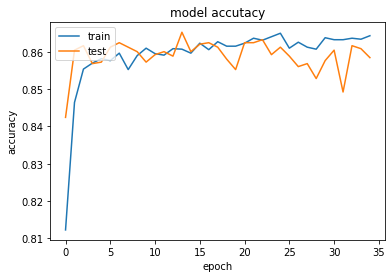

In [176]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accutacy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

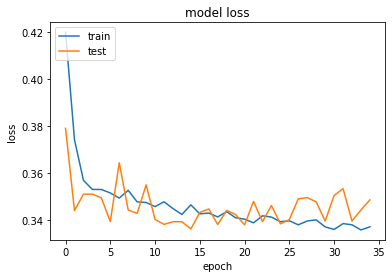

In [177]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')

In [178]:
## making the predication and evaluating the model
# predicting the test set result
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)# here you can check the threshold using ROC and AUC curve

79/79 [==============================] - 0s 1ms/step


In [179]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1907,   84],
       [ 270,  239]])

In [180]:
## calcuate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [181]:
score

0.8584

In [182]:
## get the weights
classifier.get_weights()

[array([[ 0.18236633, -0.23240295, -0.23735337, -0.5279678 ,  0.6834809 ,
         -0.82274693, -0.05128364, -0.09764741,  0.44073984, -0.07637016],
        [-2.4939404 , -1.8428952 , -0.70937127,  2.1438835 ,  0.11611395,
         -2.9409595 , -2.1302156 , -0.4114357 , -0.0657956 ,  2.37828   ],
        [ 0.21595137, -0.22522555,  0.0419077 , -0.6732658 ,  1.1241394 ,
          0.00600787, -0.09050132, -0.1335806 ,  0.8369257 , -0.28138083],
        [ 1.6316955 , -1.22811   , -1.7243602 ,  1.0231199 , -0.6950342 ,
         -2.0638154 , -0.45128456,  1.3654295 ,  0.03901793, -0.0990383 ],
        [ 0.62443686, -1.064914  ,  3.5664186 ,  1.638847  , -0.30445424,
         -0.32619828,  1.3867278 ,  3.6085029 ,  0.35133103, -0.33428326],
        [-0.17045788, -0.32305205,  0.06375983, -0.29600137,  0.16618454,
         -0.7437672 , -0.5315267 , -0.14220347,  1.5331805 , -0.34437   ],
        [ 0.51870984,  1.4734097 ,  0.20702146, -0.30466512,  1.446157  ,
          0.96809137,  0.4499538

In [183]:
## save the file in .h5 file
classifier.save('model.h5')

In [184]:
## loading h5 file 
from tensorflow import keras
classifier1 = keras.models.load_model('model.h5')

In [185]:
y_pred = classifier1.predict(x_test)

79/79 [==============================] - 0s 1ms/step


array([[0.26756677],
       [0.39725763],
       [0.20875196],
       ...,
       [0.3402801 ],
       [0.03446741],
       [0.12268431]], dtype=float32)

In [186]:
print(accuracy_score(y_test,y_pred))

0.8584
